# 等价差异模型

## 概述

本讲座展示了一个大学高中工资差距的模型，其中大学毕业生的“建设时间”起着关键作用。

Milton Friedman 发明了该模型，以研究美国牙医和医生的收入差异是竞争性劳动力市场的结果，还是反映了政府与医生专业组织合作施加的进入壁垒。

Jennifer Burns 第四章 {cite}`Burns_2023` 描述了 Milton Friedman 和 Simon Kuznets 的共同工作，最终导致了 {cite}`kuznets1939incomes` 和 {cite}`friedman1954incomes` 的出版。

要将 Friedman 的应用映射到我们的模型中，可以将我们的高中生视为 Friedman 的牙医，而将我们的大学毕业生视为 Friedman 的医生。

我们的展示是“不完整的”，因为它基于单个方程，这个方程本可以是一个更全面模型的平衡条件集合的一部分。

这个“等价差异”方程决定了一个大学和高中的工资比率，该比率使高中受教育的工人和大学受教育的工人的现值相等。

这个想法是，终身收入以某种方式调整，使新高中毕业生在上大学和不去大学而直接工作的选择之间无差异。

（在更完整的模型中，“其他方程”的任务是描述什么会调整以实现这一结果。）

我们的模型只是 “等价差异” 相对工资率理论的一个例子，这类理论至少可以追溯到亚当·斯密的《国富论》 {cite}`smith2010wealth`。

在本讲座的大部分时间里，我们将使用的唯一数学工具是线性代数，特别是矩阵乘法和矩阵求逆。

然而，在讲座的最后，我们将使用微积分，万一读者希望看到如何通过计算偏导数来更简洁地展示某些发现。

这样做还可以展示 Python 在做微积分方面的强大功能！

但如果你不了解微积分，我们的线性代数工具已经足够了。

像往常一样，我们首先导入一些 Python 模块。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

图像输入功能：已启用

## 无差异条件

关键思想是入门级大学工资溢价必须调整，使代表性工作者在上大学和不去上大学之间无差异。

设

 * $R > 1$ 为一周期债券的毛回报率

 * $t = 0, 1, 2, \ldots T$ 表示一个人工作或上大学的年份
 
 * $0$ 表示一个人高中毕业后如果不去上大学可以工作的第一个时期
 
 * $T$ 表示一个人工作最后的时期
 
 * $w_t^h$ 为高中毕业生在时间 $t$ 的工资
 
 * $w_t^c$ 为大学毕业生在时间 $t$ 的工资
 
 * $\gamma_h > 1$ 为高中毕业生工资的（毛）增长率，所以
 $ w_t^h = w_0^h \gamma_h^t$
 
 * $\gamma_c > 1$ 为大学毕业生工资的（毛）增长率，所以
 $ w_t^c = w_0^c \gamma_c^t$

 * $D$ 为上大学的前期费用

我们计算新高中毕业生在以下情况下所赚取的现值

  * 他立即去工作，并获得未受过大学教育的工资
  * 他上大学四年，毕业后获得大学毕业生的工资

### 高中受教育者的现值

如果某人高中毕业后立即去工作，并在 $T+1$ 年 $t=0, 1, 2, \ldots, T$ 期间工作，她赚取的现值为

$$
h_0 = \sum_{t=0}^T R^{-t} w_t^h = w_0^h \left[ \frac{1 - (R^{-1} \gamma_h)^{T+1} }{1 - R^{-1} \gamma_h } \right] \equiv w_0^h A_h 
$$

其中 

$$
A_h = \left[ \frac{1 - (R^{-1} \gamma_h)^{T+1} }{1 - R^{-1} \gamma_h } \right].
$$

现值 $h_0$ 是某人在时间 $0$ 开始时选择不上大学而是立即以高中毕业生工资去工作的“人力财富”。

### 准备上大学的新高中毕业生的现值


如果某人上大学四年 $t=0, 1, 2, 3$ 期间她赚取 $0$，但随后立即去工作并在 $T-3$ 年 $t=4, 5, \ldots ,T$ 期间工作，她赚取的现值为

$$
c_0 = \sum_{t=4}^T R^{-t} w_t^c = w_0^c (R^{-1} \gamma_c)^4  \left[ \frac{1 - (R^{-1} \gamma_c)^{T-3} }{1 - R^{-1} \gamma_c } \right] \equiv w_0^c A_c
$$

其中

$$
A_c = (R^{-1} \gamma_c)^4  \left[ \frac{1 - (R^{-1} \gamma_c)^{T-3} }{1 - R^{-1} \gamma_c } \right] .
$$ 

现值 $c_0$ 是某人在时间 $0$ 开始时选择上四年大学然后在时间 $t=4$ 以大学毕业生工资开始工作的“人力财富”。

假设大学学费加上四年的食宿费用为 $D$ 并且必须在时间 $0$ 支付。

所以净掉大学的货币成本，高中毕业后第一时期的上大学的现值为

$$ 
c_0 - D
$$

我们现在构建一个纯粹的 **等价差异** 初始大学-高中工资差距 $\phi$ 模型，验证

$$
w_0^c = \phi w_0^h 
$$

我们假设 $R, \gamma_h, \gamma_c, T$ 以及 $w_0^h$ 是固定参数。

我们首先注意到，纯粹的等价差异模型主张大学-高中工资差距 $\phi$ 通过一种“等价”方程来解决，该方程将不上大学的现值设置为等于上大学的现值：

$$
h_0 = c_0 - D
$$ 

或

$$ 
w_0^h A_h  = \phi w_0^h A_c - D .
$$ (eq:equalize)

这个“无差异条件”是模型的核心。

通过求解方程 {eq}`eq:equalize` 得出大学工资溢价 $\phi$：

$$
\phi  = \frac{A_h}{A_c} + \frac{D}{w_0^h A_c} .
$$ (eq:wagepremium)

在 **免费大学** 特殊情况中 $D =0$。

在这里，上大学的唯一成本是放弃作为高中受教育工作者的收入。

在这种情况下，

$$
\phi  = \frac{A_h}{A_c} . 
$$

很快我们将编写Python代码来计算$\phi$ 并将其作为其决定因素的函数绘制出来。

但首先我们将描述我们的模型的另一种解释，该解释主要是重新标记变量。

## 模型重新解释：工人和企业家

我们可以添加一个参数并重新解释变量，以获得工人和企业家的模型。

我们现在将 $h$ 视为“工人”的现值。

我们将企业家的现值定义为

$$
c_0 = \pi \sum_{t=4}^T R^{-t} w_t^c
$$

其中 $\pi \in (0,1) $ 是企业家“项目”成功的概率。

对于我们的工人和公司的模型，我们将 $D$ 解释为成为企业家的成本。

这个成本可能包括雇佣工人、办公空间和律师的费用。

我们以前称之为大学、高中工资差距 $\phi$ 现在变成了成功企业家收入与工人工资的比率。

我们将发现随着 $\pi$ 减少，$\phi$ 增加，表明成为企业家的风险越大，成功项目的回报必须越高。

## 计算

我们可以通过调整各种参数（尤其是 $\gamma_h, \gamma_c, R$）来进行一些有趣的例子。

现在让我们编写一些Python代码来计算 $\phi$ 并将其作为一些决定因素的函数绘制出来。

In [2]:
class equalizing_diff:
    """
    一个等价差异模型的类
    """
    
    def __init__(self, R, T, γ_h, γ_c, w_h0, D=0, π=None):
        # 通过设置π来转换成弱模型
        self.R, self.γ_h, self.γ_c, self.w_h0, self.D = R, γ_h, γ_c, w_h0, D
        self.T, self.π = T, π
    
    def compute_gap(self):
        R, γ_h, γ_c, w_h0, D = self.R, self.γ_h, self.γ_c, self.w_h0, self.D
        T, π = self.T, self.π
        
        A_h = (1 - (γ_h/R)**(T+1)) / (1 - γ_h/R)
        A_c = (1 - (γ_c/R)**(T-3)) / (1 - γ_c/R) * (γ_c/R)**4
        
        # 弱模型
        if π!=None:
            A_c = π*A_c 
        
        ϕ = A_h/A_c + D/(w_h0*A_c)
        return ϕ

用向量化代替循环，我们构建了一些函数来帮助做比较静态分析。

对于类的给定实例，当某个参数变化而其他参数保持固定时，我们想重新计算 $\phi$。

让我们做一个例子。

In [3]:
# ϕ_R
def ϕ_R(mc, R_new):
    mc_new = equalizing_diff(R_new, mc.T, mc.γ_h, mc.γ_c, mc.w_h0, mc.D, mc.π)
    return mc_new.compute_gap()

ϕ_R = np.vectorize(ϕ_R)

# ϕ_γh
def ϕ_γh(mc, γh_new):
    mc_new = equalizing_diff(mc.R, mc.T, γh_new, mc.γ_c, mc.w_h0, mc.D, mc.π)
    return mc_new.compute_gap()

ϕ_γh = np.vectorize(ϕ_γh)

# ϕ_γc
def ϕ_γc(mc, γc_new):
    mc_new = equalizing_diff(mc.R, mc.T, mc.γ_h, γc_new, mc.w_h0, mc.D, mc.π)
    return mc_new.compute_gap()

ϕ_γc = np.vectorize(ϕ_γc)

# ϕ_π
def ϕ_π(mc, π_new):
    mc_new = equalizing_diff(mc.R, mc.T, mc.γ_h, mc.γ_c, mc.w_h0, mc.D, π_new)
    return mc_new.compute_gap()

ϕ_π = np.vectorize(ϕ_π)

让我们进行实验，看看一些参数如何影响结果。

In [4]:
# 设置基准参数
R = 1.05
T = 40
γ_h, γ_c = 1.01, 1.01
w_h0 = 1
D = 10

# 创建实例
ex1 = equalizing_diff(R=R, T=T, γ_h=γ_h, γ_c=γ_c, w_h0=w_h0, D=D)
gap1 = ex1.compute_gap()

print(gap1)

1.8041412724969135


### 基准模型下的参数对\$ \phi \$的关系图

#### 与\$ R \$的关系

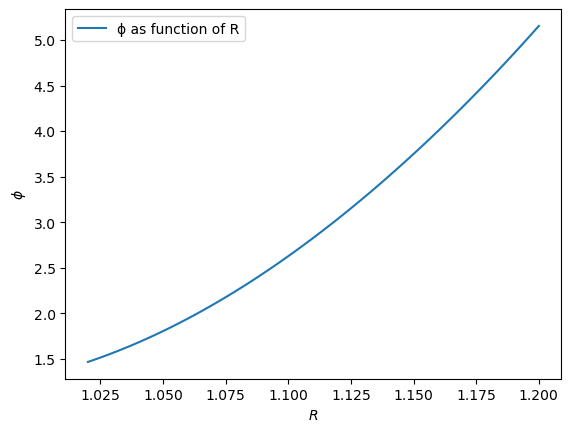

In [5]:
# 设置R值
R_values = np.linspace(1.02, 1.20, 100)

# 计算ϕ_R
ϕ_R_values = ϕ_R(ex1, R_values)

# 绘图
fig, ax = plt.subplots()
ax.plot(R_values, ϕ_R_values, label='ϕ as function of R')
ax.set_xlabel('$R$')
ax.set_ylabel('$ϕ$')
ax.legend()
plt.show()

#### 与 $\gamma_h$ 的关系

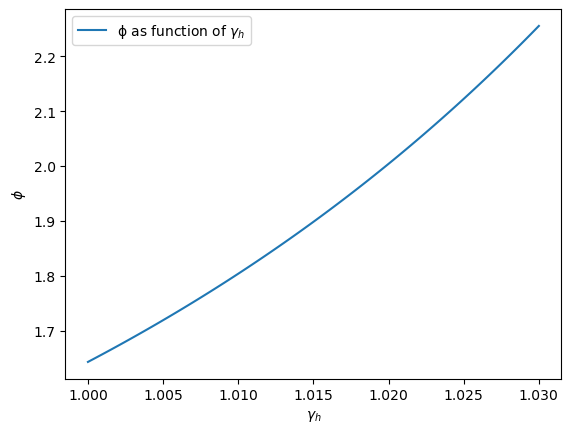

In [6]:
# 设置增长率 γ_h
γ_h_values = np.linspace(1.0, 1.03, 100)

# 计算 ϕ_γh
ϕ_γh_values = ϕ_γh(ex1, γ_h_values)

# 绘图
fig, ax = plt.subplots()
ax.plot(γ_h_values, ϕ_γh_values, label='ϕ as function of $γ_h$')
ax.set_xlabel('$γ_h$')
ax.set_ylabel('$ϕ$')
ax.legend()
plt.show()

#### 与 $\gamma_c$ 的关系

In [7]:
# 设置增长率 γ_c
γ_c_values = np.linspace(1.01, 1.05, 100)

# 计算 ϕ_γc
ϕ_γc_values = ϕ_γc(ex1, γ_c_values)

# 绘图
fig, ax = plt.subplots()
ax.plot(γ_c_values, ϕ_γc_values, label='ϕ as function of $γ_c$')
ax.set_xlabel('$γ_c$')
ax.set_ylabel('$ϕ$')
ax.legend()
plt.show()

ZeroDivisionError: float division by zero

### 收费大学与免费大学的对比

我们比较一下收费和免费大学的区别，以观察 $D$ 的影响。

#### 收费大学

In [ ]:
# 含收费大学
ex1 = equalizing_diff(R=R, T=T, γ_h=γ_h, γ_c=γ_c, w_h0=w_h0, D=D)
gap1 = ex1.compute_gap()

print("收费大学的差距: ", gap1)

#### 免费大学

我们重新计算 $\phi$，假设大学是免费的（$D=0$）。

In [ ]:
# 免费大学
ex2 = equalizing_diff(R, T, γ_h, γ_c, w_h0, D=0)
gap2 = ex2.compute_gap()
print("免费大学的差距: ", gap2)

我们可以看到，对于免费大学，初始的大学工资溢价应该会降低。

让我们构建一些图表来展示初始大学-高中工资差距 $\phi$ 如何随着某个决定因素的变化而变化。

首先，让我们从毛利率 $R$ 开始。

In [ ]:
R_arr = np.linspace(1, 1.2, 50)
plt.plot(R_arr, ϕ_R(ex1, R_arr))
plt.xlabel(r'$R$')
plt.ylabel(r'wage gap')
plt.show()

现在让我们看看高中工资的增长率 $\gamma_h$ 变化对初始工资差距 $\phi$ 的影响。

In [ ]:
γh_arr = np.linspace(1, 1.2, 50)
plt.plot(γh_arr, ϕ_γh(ex1, γh_arr))
plt.xlabel(r'$γ_h$')
plt.ylabel(r'wage gap')
plt.show()

接下来，我们研究大学工资增长率 $\gamma_c$ 的变化对初始工资差距 $\phi$ 的影响。

In [ ]:
γc_arr = np.linspace(1, 1.2, 50)
plt.plot(γc_arr, ϕ_γc(ex1, γc_arr))
plt.xlabel(r'$γ_c$')
plt.ylabel(r'wage gap')
plt.show()

注意到当大学工资增长率 $\gamma_c$ 上升时，初始工资差距会下降。

工资差距下降以“平衡”高中生和大学毕业生两种职业类型的现值。

你能猜到当我们在保持 $\phi$ 的所有其他决定因素不变的情况下，变动高中工资的增长率会发生什么吗？

下图显示了会发生什么。

In [ ]:
γh_arr = np.linspace(1, 1.1, 50)
plt.plot(γh_arr, ϕ_γh(ex1, γh_arr))
plt.xlabel(r'$γ_h$')
plt.ylabel(r'wage gap')
plt.show()

结论是高中工资的增长率 $\gamma_h$ 上升会迫使工资差距 $\phi$ 上升。

现在我们来观察加入了成功概率 $\pi$ 的情况下，初始大学-高中工资差距 $\phi$ 的变化。

In [ ]:
π_arr = np.linspace(0.1, 1.0, 50)
plt.plot(π_arr, ϕ_π(ex1, π_arr))
plt.xlabel(r'$π$')
plt.ylabel(r'wage gap')
plt.show()

我们可以看到，当成功概率 $\pi$ 下降时，初始工资差距 $\phi$ 必须上升，以弥补创业带来的更高风险。

## 企业家-工人解释

现在让我们采用我们模型的企业家-工人的解释。

如果新企业成功的概率是 $0.2$，让我们计算成功企业家的初始工资溢价。

In [ ]:
# 企业家模型
ex3 = equalizing_diff(R, T, γ_h, γ_c, w_h0, π=0.2)
gap3 = ex3.compute_gap()

print(gap3)

现在让我们研究成功概率对成功企业家初始工资溢价的影响。

In [ ]:
π_arr = np.linspace(0.2, 1, 50)
plt.plot(π_arr, ϕ_π(ex3, π_arr))
plt.ylabel(r'wage gap')
plt.xlabel(r'$\pi$')
plt.show()

## 使用微积分

到目前为止，我们只使用了线性代数工具，这对于理解我们的模型已经足够了。

但是，有些情况下，我们可能需要微积分来快速求解偏导数。

我们将使用Python模块 `sympy` 来计算确定 $\phi$ 的各个参数的偏导数。

首先，我们导入 `sympy` 的关键函数。

In [ ]:
from sympy import Symbol, Lambda, symbols

### 定义符号变量

我们定义符号变量，这些变量将用于与我们的模型相关的计算。

In [ ]:
γ_h, γ_c, R, w_h0, D = symbols('γ_h γ_c R w_h0 D')

### 定义表达式

考虑到我们之前推导的 $\phi$ 的表达式：

$$ \phi = \frac{A_h}{A_c} + \frac{D}{w_h0 A_c} $$

其中

$$ A_h = \left[ \frac{1 - (R^{-1} \gamma_h)^{T+1} }{1 - R^{-1} \gamma_h } \right] $$

和

$$ A_c = (R^{-1} \gamma_c)^4  \left[ \frac{1 - (R^{-1} \gamma_c)^{T-3} }{1 - R^{-1} \gamma_c } \right]. $$

我们将这些表达式定义为符号变量的函数：

In [ ]:
# 定义 A_h 和 A_c 的表达式
A_h = (1 - (γ_h/R)**(T+1)) / (1 - γ_h/R)
A_c = (1 - (γ_c/R)**(T-3)) / (1 - γ_c/R) * (γ_c/R)**4

# 定义初始大学-高中工资差距的表达式
phi = A_h/A_c + D/(w_h0*A_c)
phi

### 计算偏导数

现在我们计算 $\phi$ 对 $\gamma_h$ 和 $\gamma_c$ 的偏导数。

In [ ]:
from sympy import diff

# 计算对 γ_h 的偏导数
diff_phi_γ_h = diff(phi, γ_h)
diff_phi_γ_h

In [ ]:
# 计算对 γ_c 的偏导数
diff_phi_γ_c = diff(phi, γ_c)
diff_phi_γ_c

这表明当 $\gamma_h$ 或 $\gamma_c$ 变化时，$\phi$ 的变化率。

使用 `sympy` 模块，让我们进一步深入分析模型的其他重要参数的影响。

### 对于 R 的偏导数

我们还可以计算 $\phi$ 对于 R 的偏导数：

In [ ]:
# 计算对 R 的偏导数
diff_phi_R = diff(phi, R)
diff_phi_R

### 对于 D 的偏导数

我们还可以计算 $\phi$ 对于 D 的偏导数：

In [ ]:
# 计算对 D 的偏导数
diff_phi_D = diff(phi, D)
diff_phi_D

### 对于 w_h0 的偏导数

最后，我们计算 $\phi$ 对于 w_h0 的偏导数：

In [ ]:
# 计算对 w_h0 的偏导数
diff_phi_w_h0 = diff(phi, w_h0)
diff_phi_w_h0

通过这些偏导数的计算，我们可以深入了解各个参数如何影响初始大学-高中工资差距 $\phi$。

这样，我们就完成了使用微积分工具来进一步分析我们的等价差异模型。

这显示了 Python 在处理符号数学和微积分方面的强大功能。

## 定义 $\phi$

In [ ]:
ϕ = Lambda((D, γ_h, γ_c, R, T, w_h0), A_h(γ_h, R, T)/A_c(γ_c, R, T) + D/(w_h0*A_c(γ_c, R, T)))

In [ ]:
ϕ

我们首先设置默认参数值。

In [ ]:
R_value = 1.05
T_value = 40
γ_h_value, γ_c_value = 1.01, 1.01
w_h0_value = 1
D_value = 10

现在让我们计算 $\frac{\partial \phi}{\partial D}$ 并在默认值下对其进行评估

In [ ]:
ϕ_D = ϕ(D, γ_h, γ_c, R, T, w_h0).diff(D)
ϕ_D

In [ ]:
# 在默认参数下的数值
ϕ_D_func = Lambda((D, γ_h, γ_c, R, T, w_h0), ϕ_D)
ϕ_D_func(D_value, γ_h_value, γ_c_value, R_value, T_value, w_h0_value)

因此，与我们之前的图表一样，我们发现提高 $R$ 会增加初始大学工资溢价 $\phi$。

计算 $\frac{\partial \phi}{\partial T}$ 并在默认参数下对其进行评估

In [ ]:
ϕ_T = ϕ(D, γ_h, γ_c, R, T, w_h0).diff(T)
ϕ_T

In [ ]:
# 在默认参数下的数值
ϕ_T_func = Lambda((D, γ_h, γ_c, R, T, w_h0), ϕ_T)
ϕ_T_func(D_value, γ_h_value, γ_c_value, R_value, T_value, w_h0_value)

我们发现提高 $T$ 会减少初始大学工资溢价 $\phi$。这是因为大学毕业生现在有更长的职业生涯来“偿还”他们为了上大学所付出的时间和其他成本。

计算 $\frac{\partial \phi}{\partial γ_h}$ 并在默认参数下对其进行评估。

In [ ]:
ϕ_γ_h = ϕ(D, γ_h, γ_c, R, T, w_h0).diff(γ_h)
ϕ_γ_h

In [ ]:
# 在默认参数下的数值
ϕ_γ_h_func = Lambda((D, γ_h, γ_c, R, T, w_h0), ϕ_γ_h)
ϕ_γ_h_func(D_value, γ_h_value, γ_c_value, R_value, T_value, w_h0_value)

我们发现提高 $\gamma_h$ 会增加初始大学工资溢价 $\phi$，正如我们在早期的图形分析中所做的。

计算 $\frac{\partial \phi}{\partial γ_c}$ 并在默认参数值下进行数值评估

In [ ]:
ϕ_γ_c = ϕ(D, γ_h, γ_c, R, T, w_h0).diff(γ_c)
ϕ_γ_c

In [ ]:
# 在默认参数下的数值
ϕ_γ_c_func = Lambda((D, γ_h, γ_c, R, T, w_h0), ϕ_γ_c)
ϕ_γ_c_func(D_value, γ_h_value, γ_c_value, R_value, T_value, w_h0_value)

我们发现提高 $\gamma_c$ 会减少初始大学工资溢价 $\phi$，正如我们在早期的图形分析中所做的。

计算 $\frac{\partial \phi}{\partial R}$ 并在默认参数值下进行数值评估

In [ ]:
ϕ_R = ϕ(D, γ_h, γ_c, R, T, w_h0).diff(R)
ϕ_R

In [ ]:
# 在默认参数下的数值
ϕ_R_func = Lambda((D, γ_h, γ_c, R, T, w_h0), ϕ_R)
ϕ_R_func(D_value, γ_h_value, γ_c_value, R_value, T_value, w_h0_value)

我们发现提高毛利率 $R$ 会增加初始大学工资溢价 $\phi$，如我们早先的图形分析。